In [1]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
%matplotlib inline
sns.set_style("darkgrid")


In [2]:
#Reading the data from csv.file
crimes_data = pd.read_csv('crime.csv')

In [105]:
#Checking the data contents
crimes_data.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,updated_on,latitude,longitude,day_of_week,month,time,primary_type_grouped,zone,season,loc_grouped
0,2018-05-23 22:24:00,051XX S WOOD ST,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,0,0,932,9,...,10/15/2020 03:53:51 PM,41.800282,-87.669621,Wednesday,May,22,NON-CRIMINAL_ASSAULT,South,Spring,PUBLIC_AREA
1,2018-02-04 06:00:00,044XX N DAMEN AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,0,0,1912,19,...,10/14/2020 03:50:18 PM,41.962376,-87.679001,Sunday,February,6,NaN,North,Winter,RESIDENCE
2,2018-05-23 00:49:00,050XX S TALMAN AVE,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,0,0,923,9,...,10/13/2020 03:46:14 PM,41.802008,-87.690365,Wednesday,May,0,NON-CRIMINAL_ASSAULT,South,Spring,PUBLIC_AREA
3,2018-03-17 05:33:00,106XX S WENTWORTH AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,0,1,512,5,...,10/10/2020 03:53:01 PM,41.701147,-87.628119,Saturday,March,5,HUMAN_TRAFFICKING_OFFENSE,South,Spring,RESIDENCE
4,2018-05-01 00:41:00,012XX S HALSTED ST,1360,CRIMINAL TRESPASS,TO VEHICLE,STREET,1,0,1232,12,...,10/09/2020 03:45:17 PM,41.867016,-87.646918,Tuesday,May,0,CRIMINAL_OFFENSE,South,Spring,PUBLIC_AREA


In [4]:
#Handling any inconsistensis of column names
crimes_data.columns = crimes_data.columns.str.strip()
crimes_data.columns = crimes_data.columns.str.replace(',', '')
crimes_data.columns = crimes_data.columns.str.replace(' ', '_')
crimes_data.columns = crimes_data.columns.str.lower()

In [5]:
#Checking the data for any null values and its datatypes
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268227 entries, 0 to 268226
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    268227 non-null  int64  
 1   case_number           268227 non-null  object 
 2   date                  268227 non-null  object 
 3   block                 268227 non-null  object 
 4   iucr                  268227 non-null  object 
 5   primary_type          268227 non-null  object 
 6   description           268227 non-null  object 
 7   location_description  267236 non-null  object 
 8   arrest                268227 non-null  bool   
 9   domestic              268227 non-null  bool   
 10  beat                  268227 non-null  int64  
 11  district              268227 non-null  int64  
 12  ward                  268223 non-null  float64
 13  community_area        268227 non-null  int64  
 14  fbi_code              268227 non-null  object 
 15  

In [6]:
#Check the data forany duplicates
crimes_data[crimes_data.duplicated(keep=False)]

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location


In [7]:
# Removing Primary key type attriburtes as they of no use for any type of analysis, Location columns is just a 
# combination of Latitude and Longitude
crimes_data.drop(['id','case_number','location'],axis=1,inplace=True)

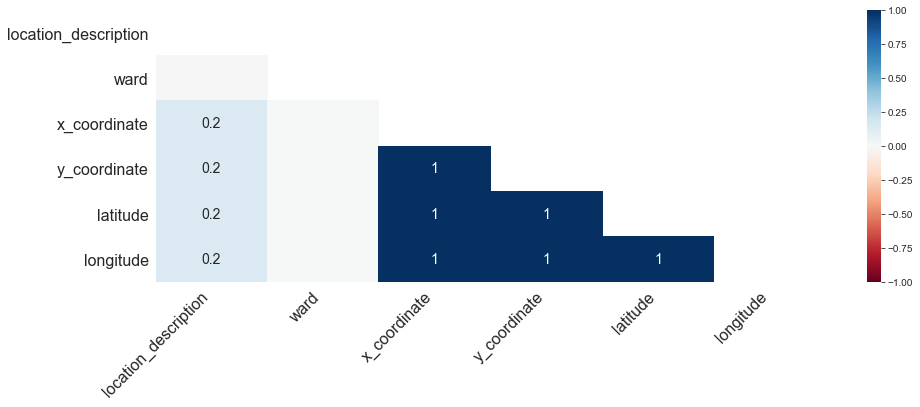

In [8]:
msno.heatmap(crimes_data,figsize=(15, 5))

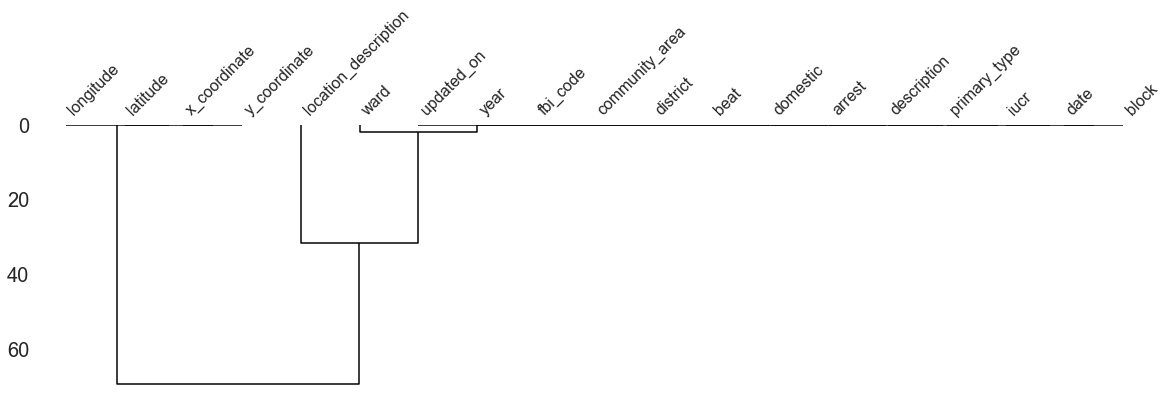

In [9]:
msno.dendrogram(crimes_data,figsize=(20,5))

As we can see from the above heatmap and dendogram that, the null values of latitude and longitude are highly co-ordinated with the x_coordinate and y_coordianate values respectively. A a co-relation of 1 here indicates that if any one of the value is missing the other one is also missing.

So we can safely remove observations where one of the values is zero. This should'nt affect our data and also limit the dropping of important observations.

In [10]:
crimes_data.isnull().sum()

date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description     991
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       4
community_area             0
fbi_code                   0
x_coordinate            4789
y_coordinate            4789
year                       0
updated_on                 0
latitude                4789
longitude               4789
dtype: int64

In [11]:
#Dropping observations where latitude is null/Nan
crimes_data.dropna(subset=['latitude'],inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

There are some data with ward and commnity_area missing, since they are very few in number we can go ahead and delete it

In [12]:
crimes_data.isnull().sum()

date                      0
block                     0
iucr                      0
primary_type              0
description               0
location_description    638
arrest                    0
domestic                  0
beat                      0
district                  0
ward                      3
community_area            0
fbi_code                  0
x_coordinate              0
y_coordinate              0
year                      0
updated_on                0
latitude                  0
longitude                 0
dtype: int64

In [13]:
crimes_data.dropna(inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

In [14]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262797 entries, 0 to 262796
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  262797 non-null  object 
 1   block                 262797 non-null  object 
 2   iucr                  262797 non-null  object 
 3   primary_type          262797 non-null  object 
 4   description           262797 non-null  object 
 5   location_description  262797 non-null  object 
 6   arrest                262797 non-null  bool   
 7   domestic              262797 non-null  bool   
 8   beat                  262797 non-null  int64  
 9   district              262797 non-null  int64  
 10  ward                  262797 non-null  float64
 11  community_area        262797 non-null  int64  
 12  fbi_code              262797 non-null  object 
 13  x_coordinate          262797 non-null  float64
 14  y_coordinate          262797 non-null  float64
 15  

We ended up removing up around 6773 rows out of the 491007 rows, there are very low chances that we missed important observations. After handling all the NULL entries we ended up with a dataset of size 484234 . Which is still a better value for our analysis

In [15]:
#Converting the data column to datetime object so we can get better results of our analysis
#Get the day of the week,month and time of the crimes
crimes_data.date = pd.to_datetime(crimes_data.date)
crimes_data['day_of_week'] = crimes_data.date.dt.day_name()
crimes_data['month'] = crimes_data.date.dt.month_name()
crimes_data['time'] = crimes_data.date.dt.hour

In [16]:
#Mapping similar crimes under one group.
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
crimes_data['primary_type_grouped'] = crimes_data.primary_type.map(primary_type_mapping)

In [17]:
#Zone where the crime has occured
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
crimes_data['zone'] = crimes_data.block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

In [18]:
#Mapping seasons from month of crime
season_map = {
    ('March','April','May') : 'Spring',
    ('June','July','August') : 'Summer',
    ('September','October','November') : 'Fall',
    ('December','January','February') : 'Winter'
}
season_mapping = {}
for keys, values in season_map.items():
    for key in keys:
        season_mapping[key] = values
crimes_data['season'] = crimes_data.month.map(season_mapping)

In [19]:
#Mapping similar locations of crime under one group.
loc_map = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENCE',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC_TRANSPORTATION',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC_BUILDING',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC_AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER'  
}

loc_mapping = {}
for keys, values in loc_map.items():
    for key in keys:
        loc_mapping[key] = values
crimes_data['loc_grouped'] = crimes_data.location_description.map(loc_mapping)

In [20]:
#Mapping crimes to ints to get better information from plots
crimes_data.arrest = crimes_data.arrest.astype(int)
crimes_data.domestic = crimes_data.domestic.astype(int)

In [21]:
#Grouping the data into years = (2018 and 2019) for analyzing
crimes_data_2018 = crimes_data[crimes_data.year == 2018]
crimes_data_2019 = crimes_data[crimes_data.year == 2019]

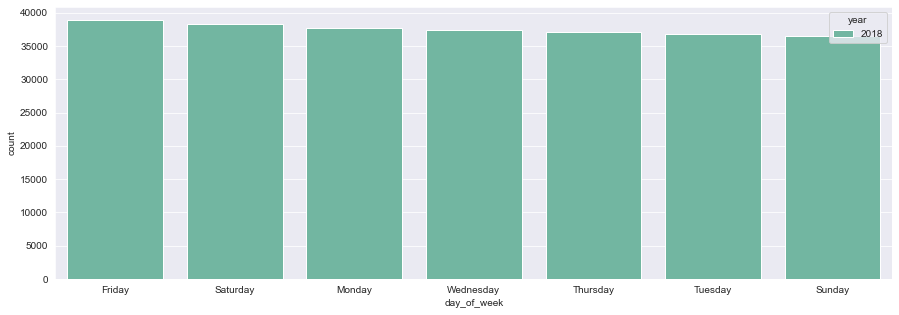

In [22]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes_data,x='day_of_week',hue='year',order=crimes_data.day_of_week.value_counts().index,palette='Set2')

From the above plot we can see that the day of the week has very little influence on the crime, it seems like almost everyday the crimes count were the same.
But when it comes to 2018 and 2019 we can see that the number of crimes are less in 2019 than in 2018

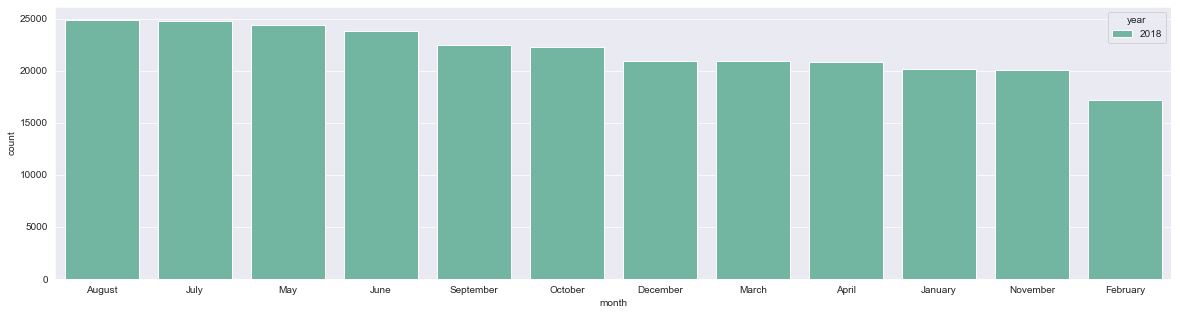

In [23]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=crimes_data,x='month',hue='year',order=crimes_data.month.value_counts().index,palette='Set2')

From the above plot we can see that May, June, July and August are the months were there are huge crime rates.
One thing is also to be noted here is that for the year 2019 there is no value for December is 0 since we dont have the data available yet and also november data is also very limited.
During February,January and November the crimes are less compared. It looks like the crime rate were low in winter's where people hardly come out of the houses.

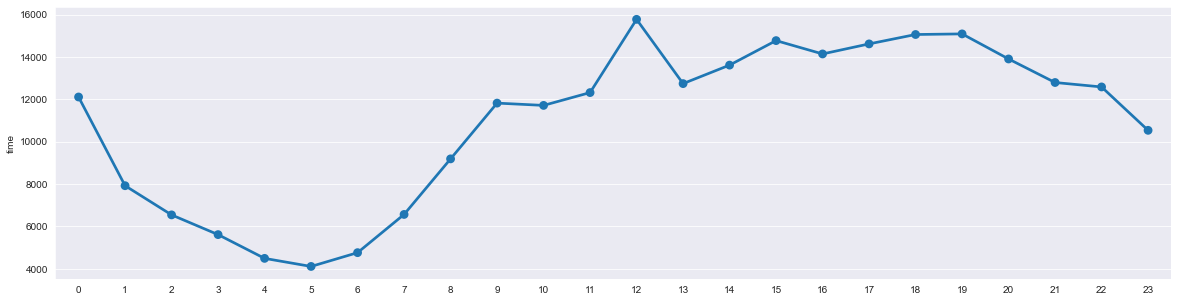

In [24]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data_2018,x=crimes_data_2018.time.value_counts().index,y=crimes_data_2018.time.value_counts())

The above plot gives the crimes that happened by hour of the day for the year 2018. Around midnight we can see there are a lot of crimes happening and it decreses gradually. There is a spike at 12 in the morning. We need to analyze more looking at the data as to why its happening. The crimes are also more around the evening.

We can see a similar trend in the year 2019 as well.

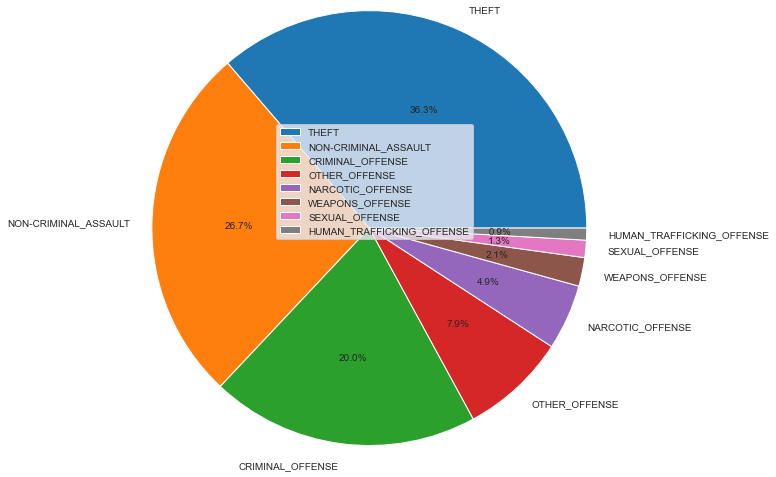

In [25]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2018.primary_type_grouped.value_counts(),labels=crimes_data_2018.primary_type_grouped.value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(loc = 'best')

By looking at the pie charts, we can see that there are a lot of Thefts and Non- Criminal Assault that happeened in the year 2019, there were very less sexual and weapons offence.
Theft and Non-Criminal Offence consitituted about 50% of the offence's

There is a same trend in the year 2019 as well, but the Thefts were a bit reduced but the count of the Non-Criminal Offence went up

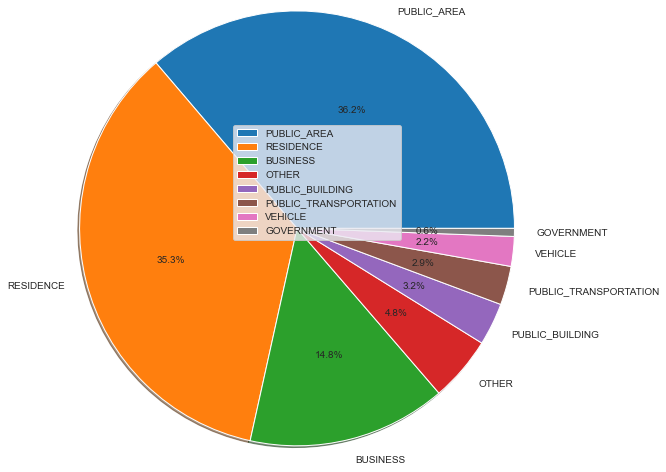

In [26]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2018.loc_grouped.value_counts(),labels=crimes_data_2018.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

From the above plot we can see that a lot of crimes happenen in pulic places and residence.Almost 60% of the incidents happened in these places.
Public transportation and Government places had very less crimes, so we can deploy more forces in resedential areas to reduce the crime rate.

The below plot of the year 2019 shows a same trend as in 2018

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

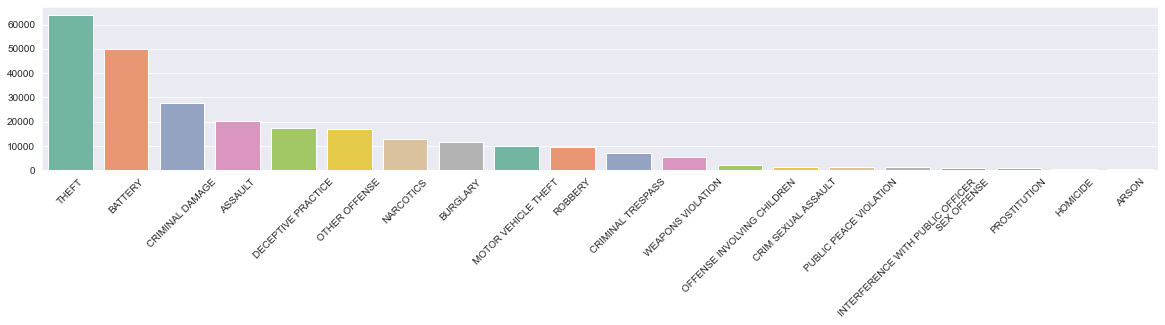

<Figure size 1440x216 with 0 Axes>

In [28]:
plt.figure(figsize=(20,3))
primary_type_plot_2018 = sns.barplot(data=crimes_data_2018,x=crimes_data_2018.primary_type.value_counts()[0:20].index,y=crimes_data_2018.primary_type.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)
plt.figure(figsize=(20,3))
primary_type_plot_2019 = sns.barplot(data=crimes_data_2019,x=crimes_data_2019.primary_type.value_counts()[0:20].index,y=crimes_data_2019.primary_type.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

We see from the above plots that there were a lot of THEFT and BATTERY related crimes that happened over the last two years.

From the below plot we can see that the East side of the city experienced fewer crimes. South Side had the greatest number of crimes.? Reason. Has to be found out. Is it because of the type of citizens? Or are there more beats in the east zone compared to south zone

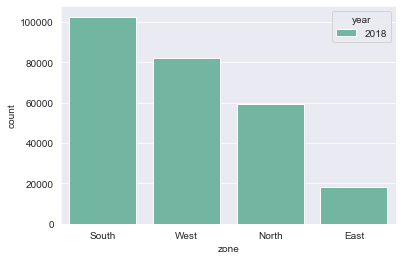

In [29]:
zone_plot = sns.countplot(data=crimes_data,x='zone',hue='year',order=crimes_data.zone.value_counts().index,palette='Set2')

We can see from the below plot that a lot of crimes happening in Summer and Spring, where the weather conditions are favourable. There are very less crimes comparably in Winters

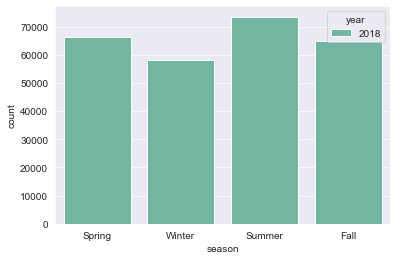

In [30]:
zone_plot = sns.countplot(data=crimes_data,x='season',hue='year',palette='Set2')

As we see from the below plot,there were a lot of criminals who were not arrested for the crime. The same trend has continued for 2019 as well. Almost 75% of the criminals went un-arrested for their crime in 2018.

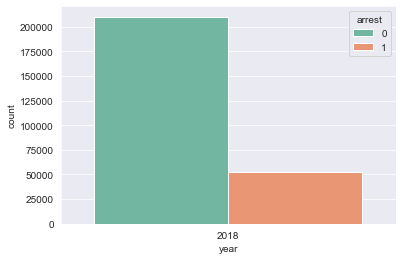

In [31]:
arrest_plot = sns.countplot(data=crimes_data,x='year',hue='arrest',palette='Set2')

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

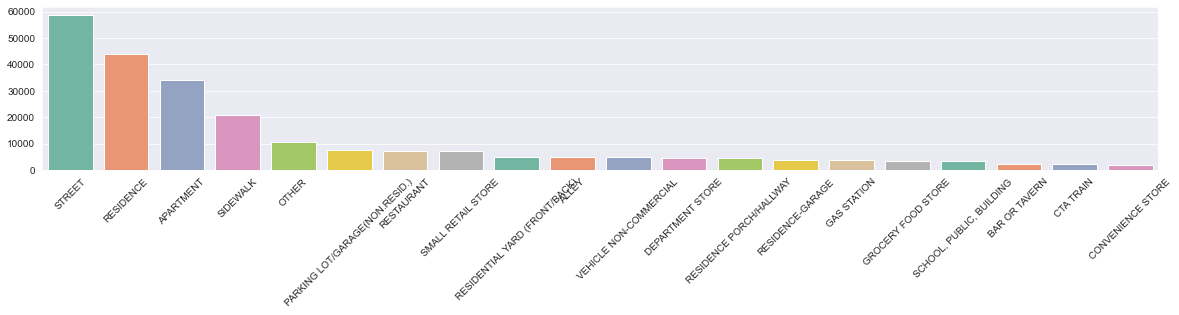

<Figure size 1440x216 with 0 Axes>

In [32]:
plt.figure(figsize=(20,3))
location_description_plot_2018 = sns.barplot(data=crimes_data_2018,x=crimes_data_2018.location_description.value_counts()[0:20].index,y=crimes_data_2018.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)
plt.figure(figsize=(20,3))
location_description_plot_2019 = sns.barplot(data=crimes_data_2019,x=crimes_data_2019.location_description.value_counts()[0:20].index,y=crimes_data_2019.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

By Looking at the two plots for the years 2018 and 2019 for the location of crime, we can see that the trend continues, A lot of street and Residential crimes are happening in the city. The trend slowly fades out.

# Complete Data 

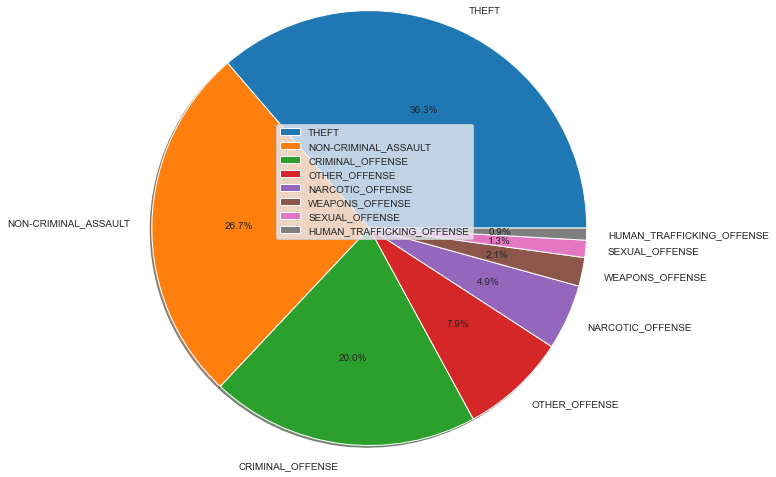

In [33]:
crimes_data_primary_type_pie = plt.pie(crimes_data.primary_type_grouped.value_counts(),labels=crimes_data.primary_type_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

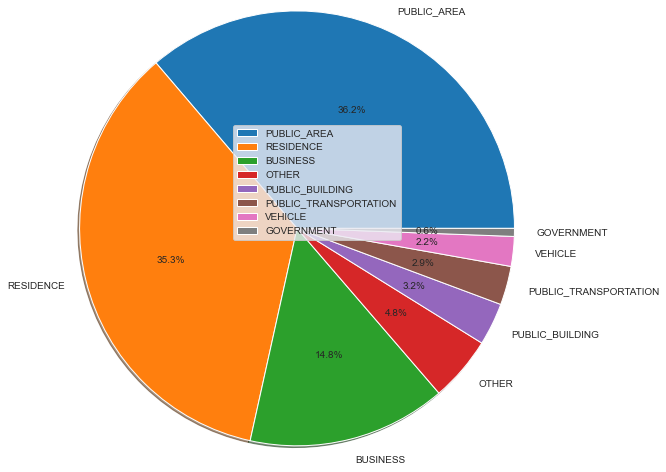

In [34]:
crimes_data_primary_type_pie = plt.pie(crimes_data.loc_grouped.value_counts(),labels=crimes_data.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

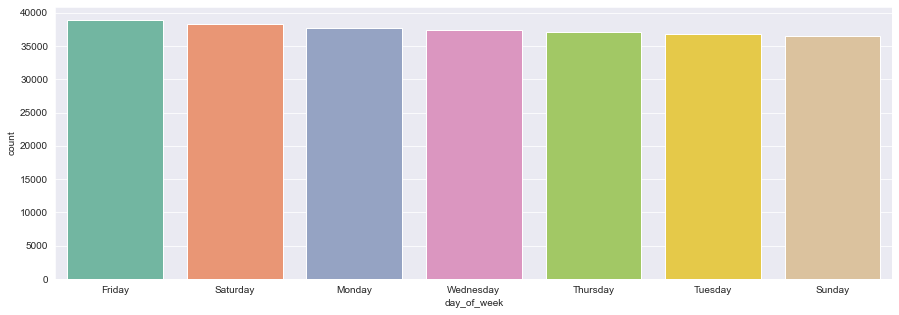

In [35]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes_data,x='day_of_week',order=crimes_data.day_of_week.value_counts().index,palette='Set2')

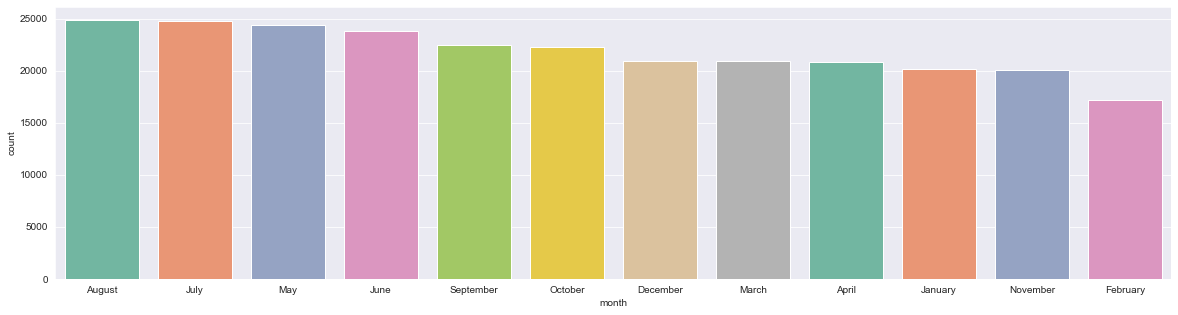

In [36]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=crimes_data,x='month',order=crimes_data.month.value_counts().index,palette='Set2')

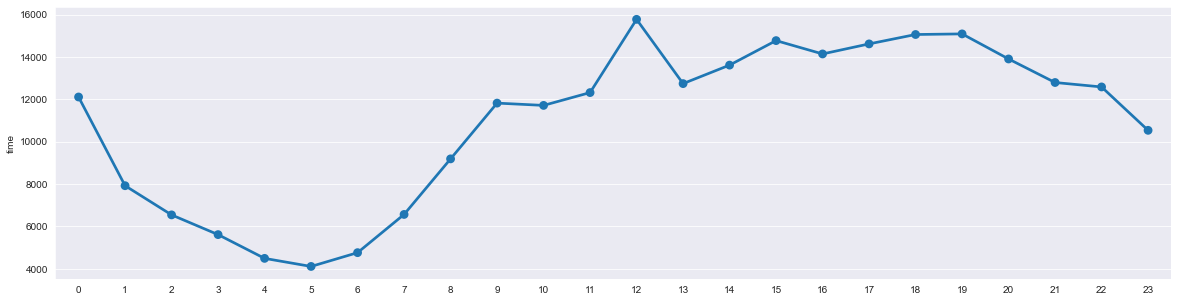

In [37]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data,x=crimes_data.time.value_counts().index,y=crimes_data.time.value_counts())

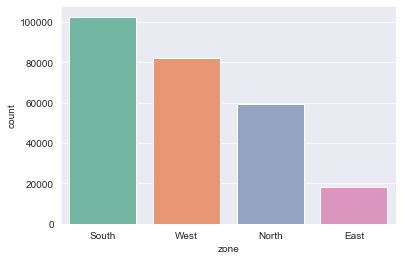

In [38]:
zone_plot = sns.countplot(data=crimes_data,x='zone',order=crimes_data.zone.value_counts().index,palette='Set2')

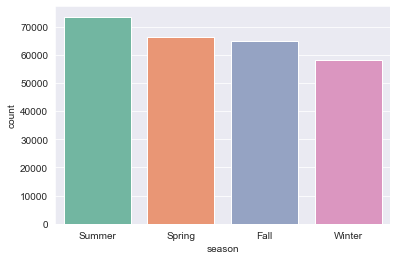

In [39]:
zone_plot = sns.countplot(data=crimes_data,x='season',order=crimes_data.season.value_counts().index,palette='Set2')

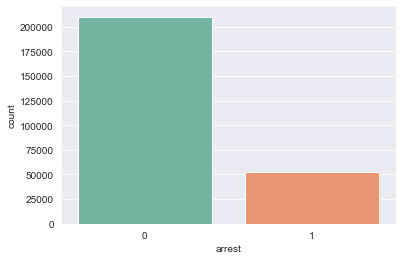

In [40]:
arrest_plot = sns.countplot(data=crimes_data,x='arrest',palette='Set2')

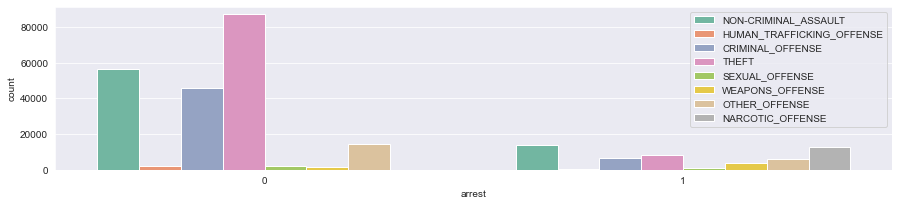

In [41]:
plt.figure(figsize=(15,3))
arrest_plot = sns.countplot(data=crimes_data,x='arrest',hue='primary_type_grouped',palette='Set2')
plt.legend(loc = 'best')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

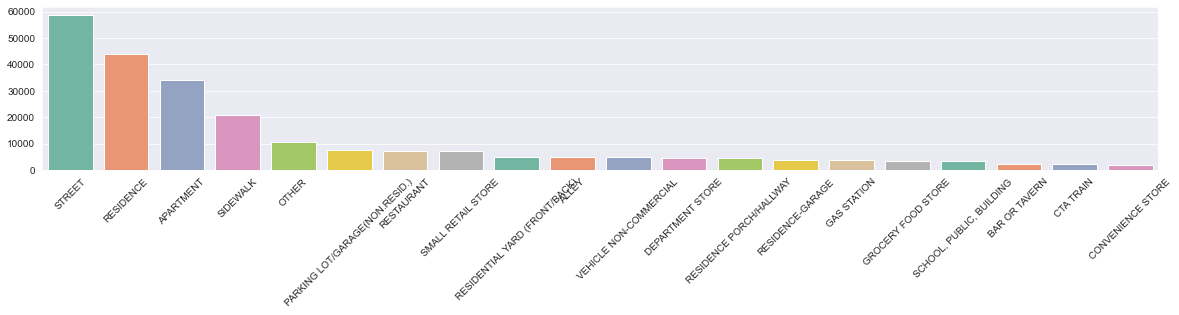

In [42]:
plt.figure(figsize=(20,3))
location_description_plot = sns.barplot(data=crimes_data,x=crimes_data.location_description.value_counts()[0:20].index,y=crimes_data.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Crimes by District')

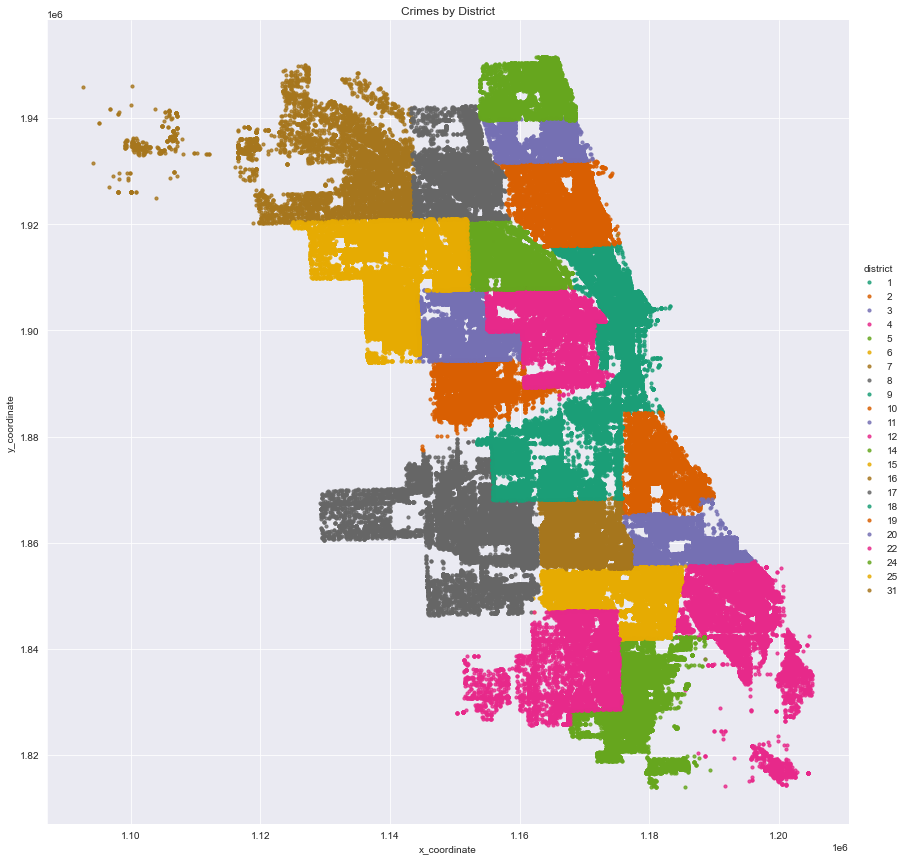

In [43]:

new_crimes_data = crimes_data.loc[(crimes_data['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="district",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by District")

Text(0.5, 1.0, 'Crimes by Type of crime')

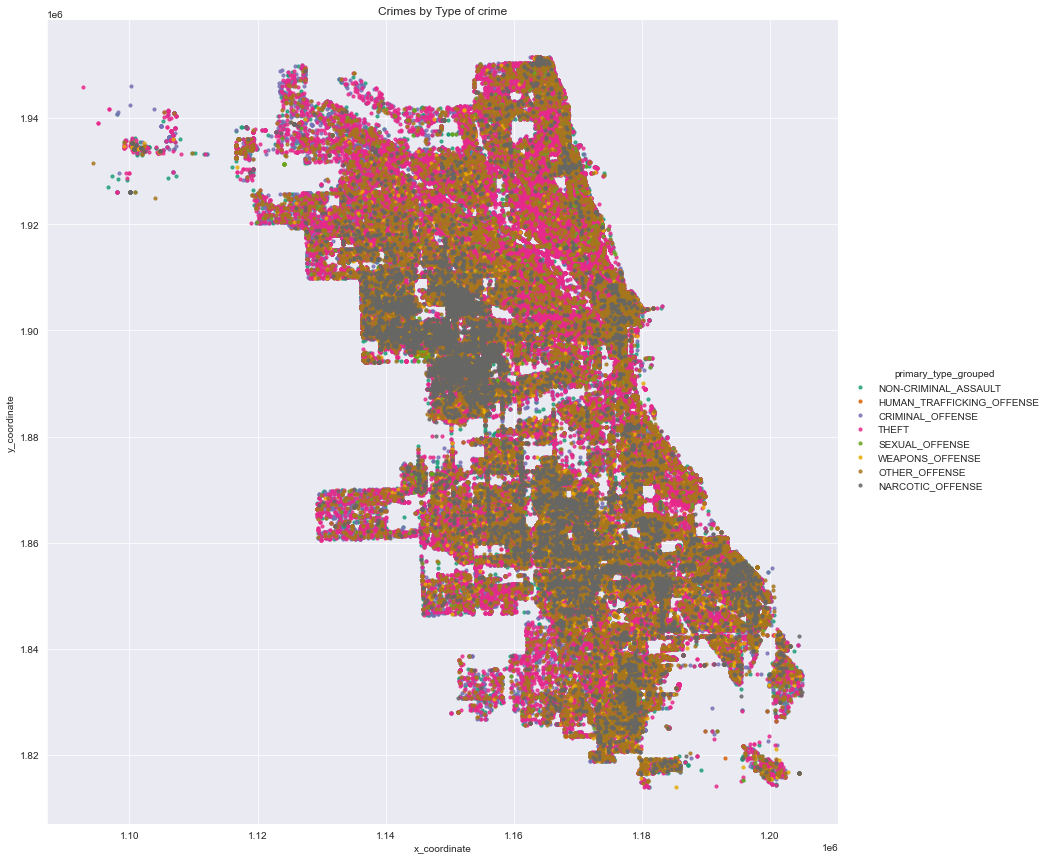

In [44]:
new_crimes_data = crimes_data.loc[(crimes_data['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="primary_type_grouped",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "o", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by Type of crime")

In [45]:
#Converting the numercial attributes to categorical attributes
crimes_data.year = pd.Categorical(crimes_data.year)
crimes_data.time = pd.Categorical(crimes_data.time)
crimes_data.domestic = pd.Categorical(crimes_data.domestic)
crimes_data.arrest = pd.Categorical(crimes_data.arrest)
crimes_data.beat = pd.Categorical(crimes_data.beat)
crimes_data.district = pd.Categorical(crimes_data.district)
crimes_data.ward = pd.Categorical(crimes_data.ward)
crimes_data.community_area = pd.Categorical(crimes_data.community_area)

In [46]:
crimes_data_prediction = crimes_data.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate'],axis=1)

In [47]:
crimes_data_prediction.head()

,arrest,domestic,beat,district,ward,community_area,year,latitude,longitude,day_of_week,month,time,primary_type_grouped,zone,season,loc_grouped
0,0,0,932,9,16.0,61,2018,41.800282,-87.669621,Wednesday,May,22,NON-CRIMINAL_ASSAULT,South,Spring,PUBLIC_AREA
1,0,0,1912,19,47.0,4,2018,41.962376,-87.679001,Sunday,February,6,NaN,North,Winter,RESIDENCE
2,0,0,923,9,14.0,63,2018,41.802008,-87.690365,Wednesday,May,0,NON-CRIMINAL_ASSAULT,South,Spring,PUBLIC_AREA
3,0,1,512,5,34.0,49,2018,41.701147,-87.628119,Saturday,March,5,HUMAN_TRAFFICKING_OFFENSE,South,Spring,RESIDENCE
4,1,0,1232,12,11.0,28,2018,41.867016,-87.646918,Tuesday,May,0,CRIMINAL_OFFENSE,South,Spring,PUBLIC_AREA


In [48]:
crimes_data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262797 entries, 0 to 262796
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   arrest                262797 non-null  category
 1   domestic              262797 non-null  category
 2   beat                  262797 non-null  category
 3   district              262797 non-null  category
 4   ward                  262797 non-null  category
 5   community_area        262797 non-null  category
 6   year                  262797 non-null  category
 7   latitude              262797 non-null  float64 
 8   longitude             262797 non-null  float64 
 9   day_of_week           262797 non-null  object  
 10  month                 262797 non-null  object  
 11  time                  262797 non-null  category
 12  primary_type_grouped  262638 non-null  object  
 13  zone                  262797 non-null  object  
 14  season                262797 non-nul

In [49]:
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

In [50]:
crimes_data_prediction.head()

,latitude,longitude,arrest_1,domestic_1,beat_112,beat_113,beat_114,beat_121,beat_122,beat_123,...,season_Spring,season_Summer,season_Winter,loc_grouped_GOVERNMENT,loc_grouped_OTHER,loc_grouped_PUBLIC_AREA,loc_grouped_PUBLIC_BUILDING,loc_grouped_PUBLIC_TRANSPORTATION,loc_grouped_RESIDENCE,loc_grouped_VEHICLE
0,41.800282,-87.669621,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,41.962376,-87.679001,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,41.802008,-87.690365,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,41.701147,-87.628119,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,41.867016,-87.646918,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [51]:
#Train test split with a test set size of 30% of entire data
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction.drop(['arrest_1'],axis=1),crimes_data_prediction['arrest_1'], test_size=0.3, random_state=42)

In [52]:
#Standardizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [66]:
conda install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: G:\Anaconda

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |           py38_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.9.0-py38h9bdc248~ --> pkgs/main::conda-4.9.0-py38_0




conda-4.9.0          | 2.9 MB    |            |   0% 
conda-4.9.0          | 2.9 MB    |            |   1% 
conda-4.9.0          | 2.9 MB    | 7          |   8% 
conda-4.9.0          | 2.9 MB    | #6         |  17% 
conda-4.9.0          | 2.9 MB    | ###5       |  35% 
conda-4.

In [53]:
#Gaussain Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[28733 34327]
 [ 3508 12272]]


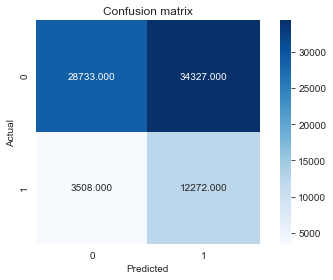

In [56]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [57]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5201040081177067
Error =  0.47989599188229326
Precision =  0.2633532908431511
Recall =  0.7776932826362484
F-1 Score =  0.3934657496914025
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.46      0.60     63060
           1       0.26      0.78      0.39     15780

    accuracy                           0.52     78840
   macro avg       0.58      0.62      0.50     78840
weighted avg       0.77      0.52      0.56     78840



In [58]:
#Decision tree with Entropy as attribute measure
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [59]:
y_pred = model.predict(X_test)

In [60]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[55161  7899]
 [ 7254  8526]]


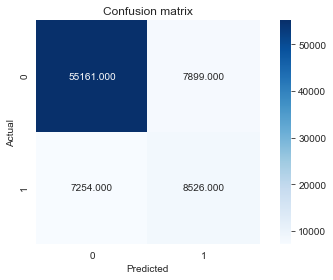

In [61]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [62]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.8078006088280061
Error =  0.19219939117199392
Precision =  0.5190867579908676
Recall =  0.5403041825095057
F-1 Score =  0.529482999534234
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.87      0.88     63060
           1       0.52      0.54      0.53     15780

    accuracy                           0.81     78840
   macro avg       0.70      0.71      0.70     78840
weighted avg       0.81      0.81      0.81     78840



In [63]:
#Random Forest classifier  - Best one
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [64]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [65]:
y_pred = model.predict(X_test)

In [66]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[61601  1459]
 [ 9039  6741]]


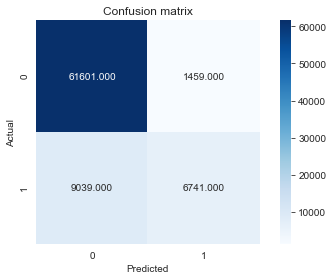

In [67]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [68]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.8668442415017757
Error =  0.13315575849822425
Precision =  0.8220731707317073
Recall =  0.4271863117870722
F-1 Score =  0.5622185154295246
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     63060
           1       0.82      0.43      0.56     15780

    accuracy                           0.87     78840
   macro avg       0.85      0.70      0.74     78840
weighted avg       0.86      0.87      0.85     78840



In [69]:
#Logistic Regression
classifier = LogisticRegression(random_state=42)

In [70]:
classifier.fit(X_train,y_train)

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[62078   982]
 [10334  5446]]


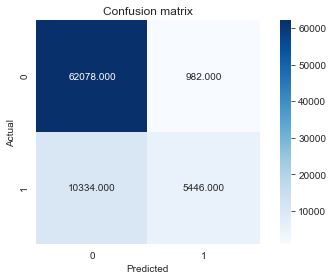

In [73]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [74]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.856468797564688
Error =  0.14353120243531203
Precision =  0.8472308649657747
Recall =  0.34512040557667933
F-1 Score =  0.4904538904899135
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     63060
           1       0.85      0.35      0.49     15780

    accuracy                           0.86     78840
   macro avg       0.85      0.66      0.70     78840
weighted avg       0.86      0.86      0.83     78840



In [75]:
crimes_data_type = crimes_data.loc[crimes_data.primary_type_grouped.isin(['THEFT','NON-CRIMINAL_ASSAULT','CRIMINAL_OFFENSE'])]
crimes_data_prediction = crimes_data_type.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate','primary_type_grouped'],axis=1)
crimes_data_prediction_type = crimes_data_type.primary_type_grouped
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

In [76]:
crimes_data_prediction.head()

,latitude,longitude,arrest_1,domestic_1,beat_112,beat_113,beat_114,beat_121,beat_122,beat_123,...,season_Spring,season_Summer,season_Winter,loc_grouped_GOVERNMENT,loc_grouped_OTHER,loc_grouped_PUBLIC_AREA,loc_grouped_PUBLIC_BUILDING,loc_grouped_PUBLIC_TRANSPORTATION,loc_grouped_RESIDENCE,loc_grouped_VEHICLE
0,41.800282,-87.669621,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,41.802008,-87.690365,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,41.867016,-87.646918,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5,41.793706,-87.661361,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6,41.960915,-87.730523,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [77]:
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction,crimes_data_prediction_type, test_size=0.3, random_state=42)

In [78]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [79]:
#Decision tree classifier for type of crime
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [80]:
y_pred = model.predict(X_test)

In [81]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 5120  3808  6777]
 [ 4002 11328  5660]
 [ 7199  5651 15802]]


In [82]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.4935192128177269
Error =  0.5064807871822731
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.31      0.33      0.32     15705
NON-CRIMINAL_ASSAULT       0.54      0.54      0.54     20990
               THEFT       0.56      0.55      0.56     28652

            accuracy                           0.49     65347
           macro avg       0.47      0.47      0.47     65347
        weighted avg       0.50      0.49      0.49     65347



In [83]:
#Random Forest classifier for type of crime
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [84]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [85]:
y_pred = model.predict(X_test)

In [86]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 4337  3562  7806]
 [ 2767 12373  5850]
 [ 5512  4684 18456]]


In [87]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5381425314092461
Error =  0.46185746859075394
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.34      0.28      0.31     15705
NON-CRIMINAL_ASSAULT       0.60      0.59      0.59     20990
               THEFT       0.57      0.64      0.61     28652

            accuracy                           0.54     65347
           macro avg       0.51      0.50      0.50     65347
        weighted avg       0.53      0.54      0.53     65347



In [88]:
#Logistic Regression for predicting the type of crime -Best
classifier = LogisticRegression(random_state=42)

In [89]:
classifier.fit(X_train,y_train)

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [90]:
y_pred = classifier.predict(X_test)

In [91]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 1773  2253 11679]
 [  969 11197  8824]
 [ 1618  1777 25257]]


In [92]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5849847735932789
Error =  0.41501522640672106
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.41      0.11      0.18     15705
NON-CRIMINAL_ASSAULT       0.74      0.53      0.62     20990
               THEFT       0.55      0.88      0.68     28652

            accuracy                           0.58     65347
           macro avg       0.56      0.51      0.49     65347
        weighted avg       0.58      0.58      0.54     65347



In [93]:
# Calculated the number of occrurances for each type of crime category in each district
district_crime_rates = pd.DataFrame(columns=['theft_count', 'assault_count', 'sexual_offense_count', 
                                             'weapons_offense_count', 'criminal_offense_count', 
                                             'human_trafficking_count', 'narcotic_offense_count', 
                                             'other_offense_count'])
district_crime_rates = district_crime_rates.astype(int) 

for i in range(1, 32):   
    temp_district_df = crimes_data[crimes_data['district'] == i] 

    temp_district_theft = temp_district_df[temp_district_df['primary_type_grouped'] == 'THEFT'] 
    num_theft = temp_district_theft.primary_type_grouped.count() 
    
    temp_district_assault = temp_district_df[temp_district_df['primary_type_grouped'] == 'NON-CRIMINAL_ASSAULT'] 
    num_assault = temp_district_assault.primary_type_grouped.count()    
    
    temp_district_sexual_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'SEXUAL_OFFENSE'] 
    num_sexual_offense = temp_district_sexual_offense.primary_type_grouped.count()
    
    temp_district_weapons_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'WEAPONS_OFFENSE'] 
    num_weapons_offense = temp_district_weapons_offense.primary_type_grouped.count()
    
    temp_district_criminal_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'CRIMINAL_OFFENSE'] 
    num_criminal_offense = temp_district_criminal_offense.primary_type_grouped.count()
    
    temp_district_human_trafficking = temp_district_df[temp_district_df['primary_type_grouped'] == 'HUMAN_TRAFFICKING_OFFENSE'] 
    num_human_trafficking = temp_district_human_trafficking.primary_type_grouped.count()
    
    temp_district_narcotic_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'NARCOTIC_OFFENSE'] 
    num_narcotic_offense = temp_district_narcotic_offense.primary_type_grouped.count()
    
    temp_district_other_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'OTHER_OFFENSE'] 
    num_other_offense = temp_district_other_offense.primary_type_grouped.count()

    district_crime_rates.loc[i] = [num_theft, num_assault, num_sexual_offense, num_weapons_offense, num_criminal_offense, num_human_trafficking, num_narcotic_offense, num_other_offense]    
    
#district_crime_rates.head()
    

In [94]:
# Standardize the data
district_crime_rates_standardized = preprocessing.scale(district_crime_rates)
district_crime_rates_standardized = pd.DataFrame(district_crime_rates_standardized)
#district_crime_rates_standardized.head()

In [95]:
# Clustering with K-Means 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(district_crime_rates_standardized)
#y_kmeans

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
kmeans_clusters = list(y_kmeans1)
# Adding cluster to our data set
district_crime_rates['kmeans_cluster'] = kmeans_clusters

#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(district_crime_rates.groupby('kmeans_cluster').mean(),1))
#kmeans_mean_cluster

#district_crime_rates.head()

In [96]:
# Clustering with DBSCAN
clustering = DBSCAN(eps = 1, min_samples = 3, metric = "euclidean").fit(district_crime_rates_standardized)

# Show clusters
dbscan_clusters = clustering.labels_
# print(clusters)

district_crime_rates['dbscan_clusters'] = dbscan_clusters + 2
#district_crime_rates.head()

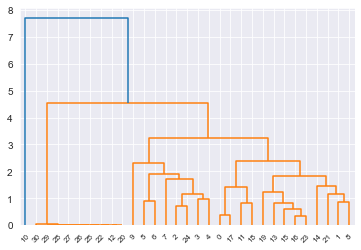

In [97]:
# Clustering with Hierarchical Clustering with average linkage
clustering = linkage(district_crime_rates_standardized, method = "average", metric = "euclidean")

# Plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

# Form clusters
hierarchical_clusters = fcluster(clustering, 4, criterion = 'maxclust')
# print(clusters)

district_crime_rates['hierarchical_clusters'] = hierarchical_clusters 
#district_crime_rates.head()

In [98]:
# Add 'district' column
district_crime_rates['district'] = district_crime_rates.index
district_crime_rates = district_crime_rates[['district', 'kmeans_cluster', 'dbscan_clusters', 'hierarchical_clusters', 'theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count', 'other_offense_count']]

In [99]:
# Remove all columns but 'district' & each method's cluster
district_crime_rates = district_crime_rates.drop(['theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count', 'other_offense_count'], axis=1)
district_crime_rates.head(31)

,district,kmeans_cluster,dbscan_clusters,hierarchical_clusters
1,1,3,1,3
2,2,3,1,3
3,3,2,2,2
4,4,2,2,2
5,5,2,2,2
6,6,2,1,2
7,7,2,1,2
8,8,2,1,2
9,9,3,1,3
10,10,2,1,2


In [100]:
# Merge each district's clusters for each method into a single dataframe 
crimes_data_clustered = pd.merge(crimes_data, district_crime_rates, on='district', how='inner')
#crimes_data.head()

Text(0.5, 1.0, 'KMeans Clustering of Crimes by District')

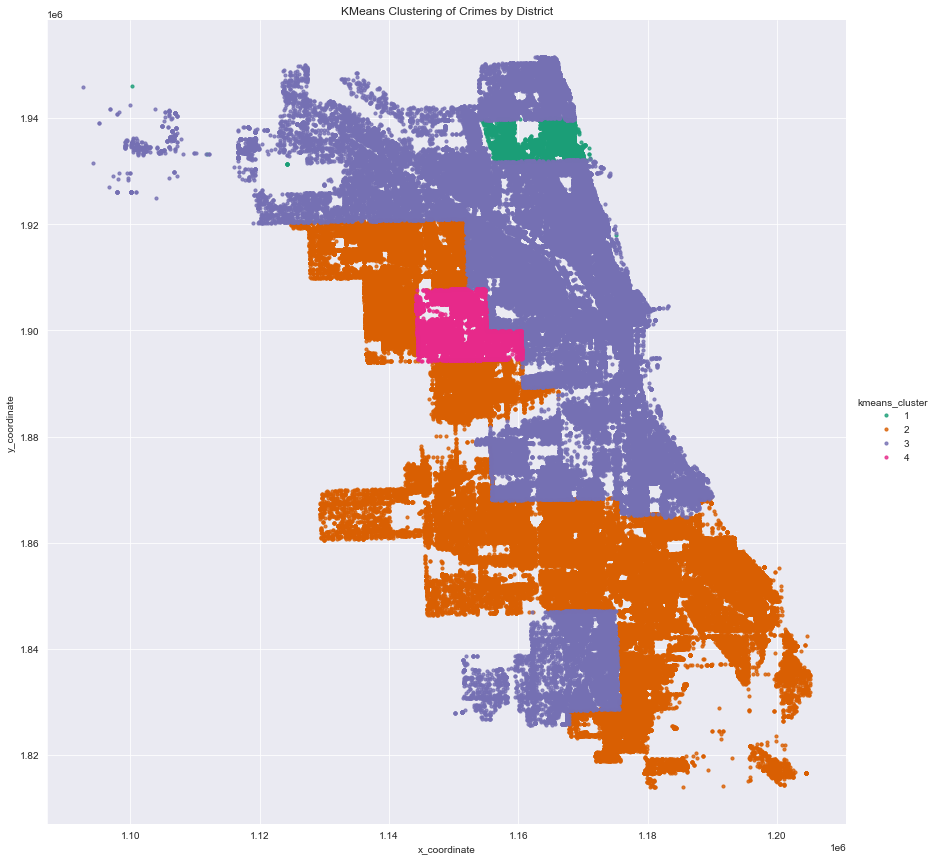

In [101]:
# Crime level clusters by district (KMeans Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="kmeans_cluster",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("KMeans Clustering of Crimes by District")

Text(0.5, 1.0, 'DBScan Clustering of Crimes by District')

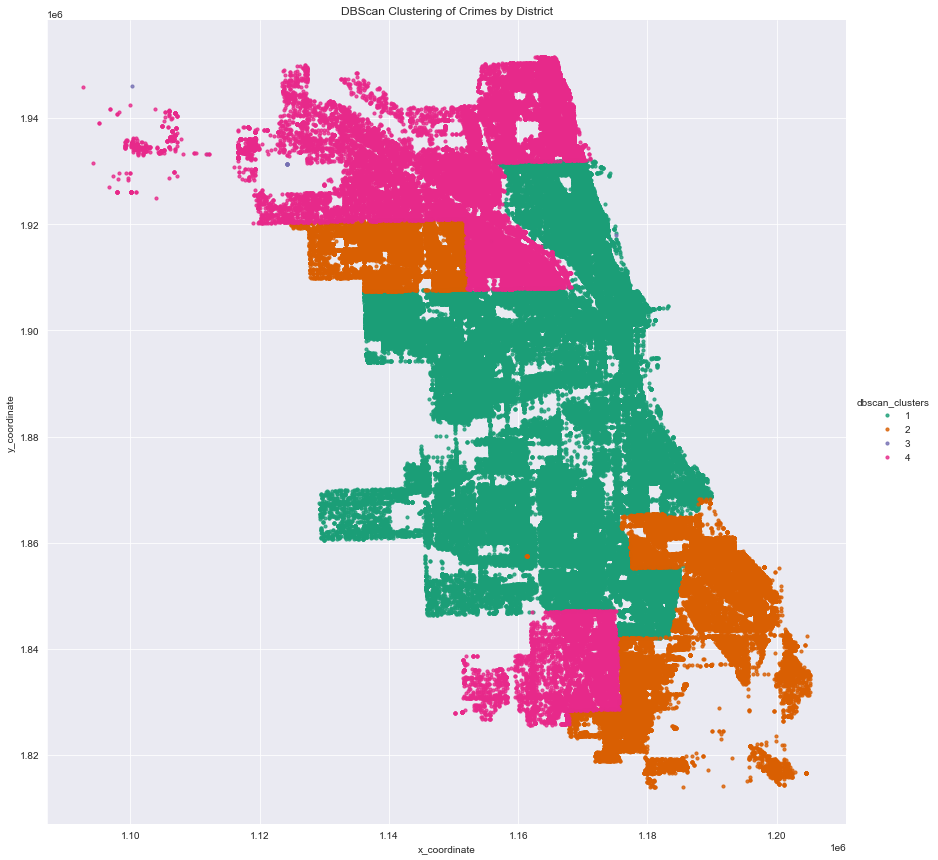

In [102]:
# Crime level clusters by district (DBScan Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="dbscan_clusters",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("DBScan Clustering of Crimes by District")

Text(0.5, 1.0, 'Hierarchical Clustering of Crimes by District')

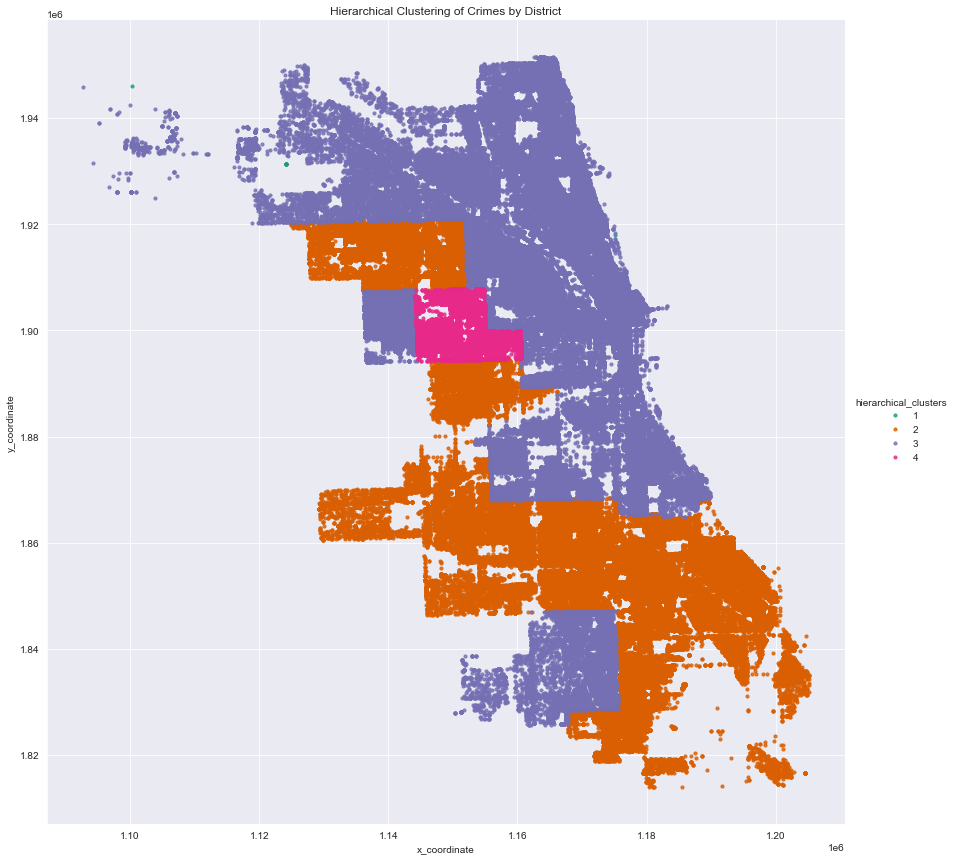

In [103]:
# Crime level clusters by district (Hierarchical Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="hierarchical_clusters",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Hierarchical Clustering of Crimes by District")

Finally, we can conclude that by analyzing the crime data using different data science models, we see that the South and West zones are more prone to crimes than the East and North Zones, Also a lot of theft related incidents are happening within the city which, the chances of the criminal being arrested for high profiles crimes like narcotics and sexual offence is high whereas for the battery and robbery related crimes very few criminals are arrested.

By deploying suitable forces within the Residential and Public areas around the South and West zones of the city in the summer and spring months, the number of crimes can possibly be reduced.